# Что мы узнаем сегодня?


1. [Как работать с пропусками в данных](#Пропуски-в-данных)
2. [Как работать с категориальными признаками](#Категориальные-признаки)
3. [Полезные преобразования данных](#Полезные-преобразования-данных)
4. [Инжинирим признаки](#Инжинирим-признаки)
5. [Поговорим про отбор признаков](#Отбор-признаков)
6. [KaggleInClass](#KaggleInClass)

# Пропуски в данных

Рассмотрим датасет `communities and crime`. Этот датасет содержит различные признаки, которые характеризуют район. Задача предсказать уровень преступности на 100 тысяч человек. Это задача регрессии.

In [1]:
import numpy as np
import pandas as pd

# Датасет взят отсюда: http://archive.ics.uci.edu/ml/datasets/communities+and+crime
# Загружаем датасет

x = pd.read_csv('communites.csv',delimiter=',')

In [2]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Columns: 128 entries, 8 to 0.2.2
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


Итак, у нас 1994 района и 122 признака, `ViolentCrimesPerPop` наша таргетная переменная.

Давайте взглянем на данные:

In [3]:
# Посмотрим на данные:
x.head()

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.0,?,0.14


Видим глазами много пропусков. А как узнать сколько значений не известно?

In [4]:
x.isna().any().sum() # сколько признаков содержат неизвестные значения

0

In [5]:
x.isna().sum()[-10:] # cколько неизвестных значений содержит каждый признак

0.12.2    0
0.26.1    0
0.2.1     0
0.06.3    0
0.04.2    0
0.9.1     0
0.5.2     0
0.32.2    0
0.14.3    0
0.2.2     0
dtype: int64

In [6]:
# Выведите одно число -- количество пропущенных значений

# <your code here>

**Как быть?**


**Удалить лишнее**
* Выкинуть данные с неизвестным признаком
* Выкинуть признак, если он имеет слишком мало известных значений

**Восстановить значения**

*В англоязычной терминологии это называется `imputation`.*
    
   * Для **вещественных** признаков
    * Заполнить все пропуски средним (модой, медианой) значениями признака
    * Предсказывать значение пропущенного признака с помощью линейной регрессии
   * Для **категориальных**
    * Отдельное значением типа "n/a"
    * Использовать самое частое значение признака


Хорошая идея также добавить отдельный признак `A_missing` и присваивать ему значение `1` всякий раз, когда значение признака `A` пропущено.

Более подробно можно почитать [здесь](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4).

In [ ]:
# Заполняем все пропуски в данных средними значениями для каждого признака
from sklearn.impute import SimpleImputer

mis_replacer = SimpleImputer(strategy="mean")
x = pd.DataFrame(data=mis_replacer.fit_transform(x), columns=x.columns-['Lakewoodcity'])

In [ ]:
# Aльтернатива через pandas
# Подробнее в описании функции
x.fillna(value=0, inplace=True)

In [ ]:
# Теперь можно проверить снова сколько у нас пропущенных данных
# Выведите одно число -- количество пропущенных значений
#<your code here>

---

# Категориальные признаки

Для примера создадим небольшую табличку

In [ ]:
import pandas as pd

# просто табличка для примера
def create_data():
    return (pd.DataFrame({'city': ['Moscow', 'London', 'London', 'Kiev',
                                   'Moscow', 'Moscow', 'Kiev','Moscow'],
                          'degree': [1,1,2,2,3,3,1,1],
                          'class':['A','B','A','A','B','B','A','A'],
                          'income':[10.2, 11.6, 8.8, 9.0, 6.6, 10.0, 9.0, 7.2]}))

data = create_data()
data

,city,degree,class,income
0,Moscow,1,A,10.2
1,London,1,B,11.6
2,London,2,A,8.8
3,Kiev,2,A,9.0
4,Moscow,3,B,6.6
5,Moscow,3,B,10.0
6,Kiev,1,A,9.0
7,Moscow,1,A,7.2


###  Как понять, что признак категориальный?

Идея - категориальные признаки те, в которых значения - строки или число уникальных значений достаточно мало.

In [ ]:
# найти все признаки, в которых первое значение - строка 
def find_cat(data, num_uniq=4):
    for name in data.columns:
        s = ''
        s += name
        if (type(data[name][0]) == str):
            s += ' строка,'
        if (data[name].nunique()<=num_uniq):
            s += ' мало уникальных'
        if (s!=name):
            print (s)
            
find_cat(data)

city строка, мало уникальных
degree мало уникальных
class строка, мало уникальных


### Как подавать категориальные признаки алгоритму?

Алгоритмы хотят, чтобы им на вход подавали числа, а не строки. Кроме того, большая часть алгоритмов машинного обучения тем или иным образом использует понятие расстояния между точками. Поэтому приходится подумать как же так представить категориальный признак, чтобы все заработало.

Существует как минимум *2 популярных подхода*:

1) Самый простой подход **one-hot кодирование**.
Выглядит это так


Этот способ наиболее универсален и применяется по умолчанию. Универсальность здесь означает -- возможность использования такого представления в любом алгоритме машинного обучения.

Теперь посмотрите на картинку. Если еще не стало понятно, то вот пояснение.

Суть в том, что каждое значение категориального признака порождает свой собственный признак. Далее, кодируем нулями и единицами отсутствие или наличие соответствующего признака.


In [ ]:
# Очень просто с помощью pandas
# Заметим при этом, что `degree` и `income` остались неизменными.
pd.get_dummies(data)

,degree,income,city_Kiev,city_London,city_Moscow,class_A,class_B
0,1,10.2,0,0,1,1,0
1,1,11.6,0,1,0,0,1
2,2,8.8,0,1,0,1,0
3,2,9.0,1,0,0,1,0
4,3,6.6,0,0,1,0,1
5,3,10.0,0,0,1,0,1
6,1,9.0,1,0,0,1,0
7,1,7.2,0,0,1,1,0


Если хочется больше гибкости, можно попробовать для тех же целей воспользоваться `OneHotEncoder` из `sklearn.preprocessing`

2) **Группируем числовые признаки по категориальным**

Например, для каждого значения признака `city` из нашей таблички можно посчитать среднее значение `income`.

In [ ]:
# функция возвращает значения нового признака
def code_mean(data, cat_feature, real_feature):
    return (data[cat_feature].map(data.groupby(cat_feature)[real_feature].mean()))

data = create_data()
data['city_mean_income'] = code_mean(data, 'city', 'income')
data[:6]

,city,degree,class,income,city_mean_income
0,Moscow,1,A,10.2,8.5
1,London,1,B,11.6,10.2
2,London,2,A,8.8,10.2
3,Kiev,2,A,9.0,9.0
4,Moscow,3,B,6.6,8.5
5,Moscow,3,B,10.0,8.5


In [ ]:
code_mean(data, 'city', 'income')

0     8.5
1    10.2
2    10.2
3     9.0
4     8.5
5     8.5
6     9.0
7     8.5
Name: city, dtype: float64

### Дата и время

Для примера рассмотрим датасет UFO (оригинальная полная версия датасета находится [здесь](https://www.kaggle.com/NUFORC/ufo-sightings)) в котором для каждого события известна дата и конкретное время

In [ ]:
df = pd.read_csv("ufo.csv")
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [ ]:
# посмотрим типы столбцов в таблице
df.dtypes 

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [ ]:
# Переводим Time в формат времени
# Теперь для столбца "Time" тип изменился
#df['dateime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)
#df.insert(1, 'year', df['datetime'].dt.year)
df.dtypes
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,dateime
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10 20:30:00
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949-10-10 21:00:00
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955-10-10 17:00:00
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10 21:00:00
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10 20:00:00
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961-10-10 19:00:00
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000,1965-10-10 21:00:00
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965-10-10 23:45:00
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111,1966-10-10 20:00:00
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167,1966-10-10 21:00:00


Правильный формат данных для хранения даты времени позволяет сразу получать категориальные признаки

In [ ]:
# Какой час
df['datetime'].dt.hour.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Название дня недели
df.Time.dt.weekday_name.head() 

In [ ]:
# Является ли этот день выходным
df['is_weekend'] = df['datetime'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

AttributeError: 'str' object has no attribute 'date'

In [ ]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,dateime
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10 20:30:00
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949-10-10 21:00:00
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955-10-10 17:00:00
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10 21:00:00
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10 20:00:00


* **Проекция на окружность и использованием 2х координат**

Использование более эзотерических подходов для нормализации значения времени.

---
**Идея взята из курса [ml course open](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-6-feature-engineering-and-feature-selection-8b94f870706a)

In [ ]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)

make_harmonic_features(12)

(-1.0, 1.2246467991473532e-16)

### Геоданные

Возможно находить строковый адрес по данным координатам локации, однако это требует большой аккуратности в интерпретации и чистке полученных значений.


---
**Идея взята из курса [ml course open](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-6-feature-engineering-and-feature-selection-8b94f870706a)

In [ ]:
#!pip install reverse_geocoder

In [ ]:
import reverse_geocoder as revgc
revgc.search((40.74482, -73.94875))

---

# Полезные преобразования данных

Иногда числовые значения признаков хорошо бы привести к другим значениям с помощью преобразований. Очень часто это может улучшить результаты некоторых алгоритмов. Такие алгоритмы, как правило, делают некоторые предположения о характере данных или же опираются на расстояния между элементами выборки.


**Популярные преобразования**

(1) **Z-score**
$$\large z(x) = \frac{x - \mu}{\sigma}$$

* Полезно, если существенно расстояние между точками (например в knn)
* Это преобразование линейное, оно не меняет распределение данных

In [ ]:
# Есть в sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
# Обратим внимание на значение 100
data = np.array([1, 1, 0, -1, 2, 3, -2, 4, 100], dtype=np.float32).reshape(-1,1)
StandardScaler().fit_transform(data)

array([[-0.3529866 ],
       [-0.3529866 ],
       [-0.3850763 ],
       [-0.417166  ],
       [-0.32089692],
       [-0.2888072 ],
       [-0.44925568],
       [-0.25671753],
       [ 2.8238928 ]], dtype=float32)

In [ ]:
# Это то же самое, что сделать это руками:
(data - data.mean()) / data.std()

array([[-0.3529866 ],
       [-0.3529866 ],
       [-0.3850763 ],
       [-0.417166  ],
       [-0.32089692],
       [-0.28880724],
       [-0.44925568],
       [-0.25671753],
       [ 2.8238928 ]], dtype=float32)

   ---
   (2) **MinMax Scaling**
    
Другой достаточно популярный вариант – MinMax Scaling, который переносит все точки на заданный отрезок (обычно (0, 1))
$$ \large X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}} $$

* Полезно, если хочется оценить влияние признака по весам в линейной регрессии
* Можно перенести значение признака в интервал (0, 255) для визуализации

В целом, оба варианта часто взаимозаменяемы.

In [ ]:
# Демонстрация
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(data)

array([[0.02941177],
       [0.02941177],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.0000001 ]], dtype=float32)

In [ ]:
(data - data.min()) / (data.max() - data.min())

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]], dtype=float32)

(3) **Логарифмирование**

~~(как способ бороться с тяжелыми хвостами)~~


* Существует ряд преобразований, которые позволяют из распределения с "тяжелым хвостом" (в английском варианте long tail) сделать распределение похожее на нормальное. 

* Нормальное распределение нравится многим алгоритмам машинного обучения и такое преобразование иногда может улучшить ситуацию.


In [ ]:
# Настраиваем параметры отрисовки графиков
%pylab inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


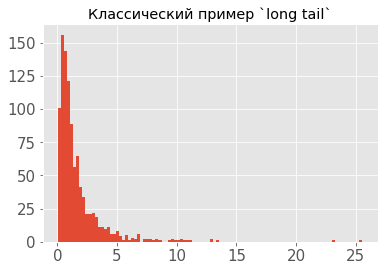

In [ ]:
from scipy.stats import lognorm

# сгенерируем себе выборку

data = lognorm(s=1).rvs(1000)
plt.hist(data, bins=100)
plt.title("Классический пример `long tail`")
plt.show()

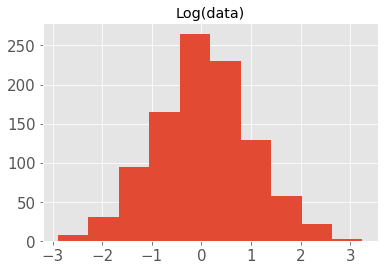

In [ ]:
# А вот так выглядят данные после логарифмирования

plt.hist(np.log(data))
plt.title("Log(data)")
plt.show()

---

# Инжинирим признаки


Как помочь нашей модели найти полезные зависимости в данных?

Можно условно поделить генерацию признаков на **две части**:
 1. Создание признаков **на основе знаний** и житейского опыта
 2. Создание различных **взаимодействий** признаков
 

### Полиномиальные признаки

Почему готовить новые признаки это хорошо?

**XOR проблема**

XOR – это "исключающее ИЛИ", булева функция со следующей таблицей истинности:



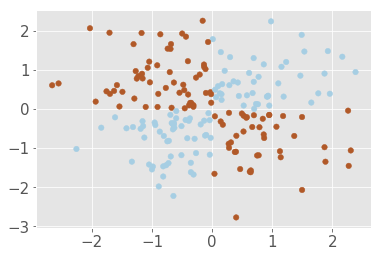

In [ ]:
# порождаем данные
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Функция рисует плоскость согласно предсказаниям классификатора clf
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

In [ ]:
from sklearn.linear_model import LogisticRegression

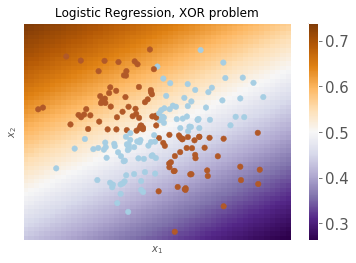

In [ ]:
# Применяем логистическую регрессию к нашим данным
# И видим, что линейная модель не способна разделить точки правильно
plot_boundary(LogisticRegression(), X, y, "Logistic Regression, XOR problem")

### Что мы делаем?
Добавляем полиномиальные признаки!

Т.е. получаем несколько признаков из данных путем их возведения в степень и перемножения между собой.

**Пример с двумерными данными, degree*=2**

**degree - максимальная сумма степеней множителей-признаков в отдельно полученном новом признаке*

$$\Large (a, b) \rightarrow (1, a, b, a^2, ab, b^2)$$

Удобно, что sklearn уже умеет генерировать полиномиальные признаки для нас

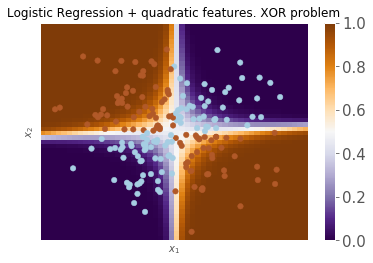

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Очень часто удобно использовать Pipeline
# для последовательного применения алгоритмов из sklearn
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('logit', LogisticRegression())])
plot_boundary(logit_pipe, X, y,
        "Logistic Regression + quadratic features. XOR problem")

# Проблема решается!

### Применение житейской смекалки
для создания признаков



Есть количество комнат и стоимость аренды

Выделяем новый признак -- стоимость аренды одной комнаты:
```python
rooms = df["bedrooms"]
df["price_per_bedroom"] = df["price"] / rooms
```

# Отбор признаков

1. Чисто статистическими методами
2. С использованием моделей
3. Перебором

## Статистические методы

### Отсечение низко вариативных признаков

1. Если признак имеет одинаковые значения на всех элементах выборки за исключением очень небольшого подмножества, то такой признак скорее всего не будет полезен.

2. Такой же вывод можно сделать для признаков, имеющих одинаковые значения для всех элементов выборки.

Чтобы посчитать численно насколько признак вариативен можно посчитать дисперсию этого признака. Дисперсия будет давать 0 для случая 2 и число, близкое к 0 для случая 1.
$${ D ={\dfrac {\sum \limits _{i=1}^{n}(X_{i}-{\bar {X}})^{2}}{n}}}$$
* $\bar{X}$ -- среднее значение признака в датасете $X$


В качестве бейзлайна можно воспользоваться отбором признаков по пороговому значению дисперсии.

    !ВАЖНО ПОМНИТЬ:
    Необходимо, чтобы все признаки в датасете при таком подходе имели одинаковый разброс значений. Т.е максимальное и минимальное значение должно быть одинаковым для всех признаков, чтобы сравнение значений их дисперсий было корректным. Для соблюдения этого условия удобно воспользоваться MinMaxScaler.

In [ ]:
# сгенерируем признаки с разбросом 0..1
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification

x_data_generated, y_data_generated = make_classification(scale=1)
print("data shape: ", x_data_generated.shape)

data shape:  (100, 20)


In [ ]:
VarianceThreshold(.7).fit_transform(x_data_generated).shape

(100, 19)

In [ ]:
VarianceThreshold(.8).fit_transform(x_data_generated).shape

(100, 19)

In [ ]:
VarianceThreshold(.9).fit_transform(x_data_generated).shape

(100, 15)

### Отбор k лучших с помощью ANOVA

**Главная идея метода ANOVA для задачи классификации**

ANOVA -- ANalysis Of VAriance (или дисперсионный анализ).

Для каждого признака из датасета мы можем посчитать его выразительную способность. Т.е мы можем получить число, показывающее насколько сильно данный признак различается между различными классами из $Y$. 
Упрощенное объяснение следующее.

1. Используем знания о лейблах $Y$. Считаем дисперсию данного признака внутри каждого класса из $Y$.
2. Считаем дисперсию данного признака между группами, которые задает $Y$.
2. Финальный скор это -- отношение дисперсии между группами к дисперсии внутри групп.

Для лучшего понимания можно посмотреть [видео 1](https://youtu.be/ITf4vHhyGpc) (тут интуиция) и [видео 2](https://youtu.be/q48uKU_KWas) (тут математика).

Такой скор можно использовать для ранжирования признаков по их значимости. Реализация из sklearn позволяет заранее задать число признаков, которое мы хотим оставить исходя из полученных с помощью метода ANOVA скоров.



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Выбираем 5 лучших фичей с помощью скоринговой функции для классификации f_classif в методе ANOVA
x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)

# Выбираем фичи по граничному значению дисперсии данных
x_data_varth = VarianceThreshold(.9).fit_transform(x_data_generated)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Результат для исходных данных
cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()

0.7896613190730838

In [ ]:
# Для отбора по вариативности
cross_val_score(LogisticRegression(), x_data_varth, y_data_generated, scoring='accuracy').mean()

0.7899584076054665

In [ ]:
# Для отбора по ANOVA
cross_val_score(LogisticRegression(), x_data_kbest, y_data_generated, scoring='accuracy').mean()

0.9004753416518122

### Использование моделей
Для отбора признаков чаще всего используют L1 регуляризацию с линейной/логистической регрессией или случайный лес (о котором вы пока не знаете)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Еще раз покажем результат с простой моделью и исходными данными

lr = LogisticRegression()
print(cross_val_score(lr, x_data_generated, y_data_generated, scoring='accuracy').mean())

0.7896613190730838


In [ ]:
# Теперь произведем отбор признаков с помощью нашей логистической регрессии,
# Отобранные признаки подадим далее в саму логистическую регрессию

pipe = make_pipeline(SelectFromModel(estimator=LogisticRegression(penalty='l1',)), LogisticRegression())
print(cross_val_score(pipe, x_data_generated, y_data_generated, scoring='accuracy').mean())

0.7899584076054665


Также возможно рекурсивное удаление признаков из датасета с помощью [sklearn.feature_selection.RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html). 

В этом случае после удаления наихудшего признака по меркам коэффициентов регрессии, модель будет обучена заново на уже меньшем подмножестве признаков. Затем процесс с удалением признака и переобучением модели повторяется, пока не достигнуто желаемое количество лучших признаков.

### Перебор признаков

* **SequentialFeatureSelector** - жадный алгоритм поиска подмножества из k признаков на основании результатов кросс-валидации. Может быть использован с любой моделью.

Имеет 2 основных сеттинга
* Sequential Forward Selection (SFS)

        Начальное число избранных признаков 0.
        Алгоритм добавляет на каждом шаге один признак, который максимизирует скор на кросс-валидации. Алгоритм           останавливает добавление новых признаков, когда достигнуто необходимое число этих признаков. Используется         по дефолту в `SequentialFeatureSelector`.

* Sequential Backward Selection (SBS)

        Начальное число избранных признаков N (т.е все признаки включены в коллекцию).
        Алгоритм убирает из коллекции на каждом шаге один признак, удаление которого максимизирует скор на кросс-валидации. Алгоритм останавливает удаление признаков, когда достигнуто необходимое число этих признаков. Параметр `forward=False` в `SequentialFeatureSelector`.

In [ ]:
# устанавливаем mlxtend:
!pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

selector = SequentialFeatureSelector(LogisticRegression(), scoring='accuracy',
                                     verbose=2, k_features=7, forward=True, n_jobs=-1)

selector.fit(x_data_generated, y_data_generated)

Итак, удалось достаточно неплохо улучшить accuracy с этим методом по сравнению с предыдущими, однако, это синтетическая задачка. С реальными данными все намного сложнее.

# KaggleInClass

Начнем решать соревнование на платформе `Kaggle` (пока только `InClass`)

Ссылка на соревнование: https://www.kaggle.com/c/best-home2

In [41]:
import numpy as np
import pandas as pd
import matplotlib as plt

import plotly.express as px
import plotly.graph_objects as go

In [42]:
df = pd.read_csv("homework competition/train.csv")
X_test = pd.read_csv("homework competition/test.csv")
df.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               34546 non-null  int64  
 1   bathrooms        34546 non-null  float64
 2   bedrooms         34546 non-null  int64  
 3   building_id      34546 non-null  object 
 4   created          34546 non-null  object 
 5   description      33509 non-null  object 
 6   display_address  34458 non-null  object 
 7   features         34546 non-null  object 
 8   latitude         34546 non-null  float64
 9   listing_id       34546 non-null  int64  
 10  longitude        34546 non-null  float64
 11  manager_id       34546 non-null  object 
 12  photos           34546 non-null  object 
 13  price            34546 non-null  int64  
 14  street_address   34542 non-null  object 
 15  TARGET           34546 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 4.2+ MB


In [44]:
df.shape

(34546, 16)

In [45]:
px.set_mapbox_access_token(open('.mapbox_token').read())

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color='TARGET', zoom=12)
fig.show()

Зачем этот график? Ну, он просто красивый

In [46]:
X = df.drop(['TARGET', 'listing_id', 'Id'], axis=1)
y = df['TARGET']

X.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,photos,price,street_address
0,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10
1,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South
2,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street
3,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street
4,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street


In [47]:
def string_to_list(line):
    return line.replace('[', '').replace(']', '').replace("'", '').split(', ')

In [48]:
# обрабатывать картинки я не умею( поэтому буду только учитывать их кол-во
def count_photos(elem):
    # делаем из строки список
    elem = string_to_list(elem)
    if elem[0] == '':
        return 0
    return len(elem)

X['photos count'] = X['photos'].apply(count_photos)
X = X.drop('photos', axis=1)
X.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,price,street_address,photos count
0,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,4495,W 50 & AVE 10,3
1,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,-74.0322,e5808a5e6cc13988fe596704428d38d5,2570,55 River Drive South,13
2,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,-73.9751,d69d4e111612dd12ef864031c1148543,1795,22 W 77 Street,6
3,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,-74.0065,e6472c7237327dd3903b3d6f6a94515a,3400,100 John Street,4
4,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,-74.0025,6fba9b3a8327c607b8b043716efee684,5695,321 West 16th Street,3


In [49]:
def rooms_per_bath(elem):
    try:
        return float(elem['bedrooms']) / float(elem['bathrooms'])
    except ZeroDivisionError:
        return 0

X['rooms per bath'] = X.apply(rooms_per_bath, axis=1)
X.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,price,street_address,photos count,rooms per bath
0,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,4495,W 50 & AVE 10,3,3.0
1,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,-74.0322,e5808a5e6cc13988fe596704428d38d5,2570,55 River Drive South,13,1.0
2,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,-73.9751,d69d4e111612dd12ef864031c1148543,1795,22 W 77 Street,6,0.0
3,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,-74.0065,e6472c7237327dd3903b3d6f6a94515a,3400,100 John Street,4,2.0
4,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,-74.0025,6fba9b3a8327c607b8b043716efee684,5695,321 West 16th Street,3,3.0


In [50]:
def convert_to_array(elem):
    elem = string_to_list(elem)
    return np.array(elem)

X['features'] = X['features'].apply(convert_to_array)

Я думал как-то обработатывать список особенностей квартир, но не придумал как это делать эффективно( 

In [51]:
# X['features'].head()

In [52]:
# features_count = {}

# def count_features(elem):
#     global features_count

#     for feature in elem:
#         if feature.lower() not in features_count.keys():
#             features_count[feature.lower()] = 0
#         features_count[feature.lower()] += 1

# X['features'].apply(count_features)

In [53]:
# features_count

In [54]:
# почистим малоиспользуемые теги
# amount = []
# for key in features_count.keys():
#     amount.append(features_count[key])

# amount = np.array(amount)
# amount.mean(), np.median(amount)

In [55]:
# очень много фич, которые указыны буквально в паре объявлений, на выборке в несколько тысяч их исключение ничего не изменит
# cleaned_dict = {}
# for key in features_count.keys():
#     if features_count[key] > 75:
#         cleaned_dict[key] = features_count[key]

# len(cleaned_dict)

In [56]:
# def get_name_of_feature(name):
    # return 'has' + ''.join(name.split())

In [57]:
# def one_hot_encode(elem):
#     global features_count
#     all_features = np.array(features_count.keys())
#     print(all_features)
#     # for feature in elem['features']:
#     #     name = get_name_of_feature(feature)

# X.apply(one_hot_encode, axis=1)

In [58]:
X['created'] = pd.to_datetime(X['created'])

In [59]:
X['created']

0       2016-05-19 18:06:27
1       2016-06-16 02:01:49
2       2016-05-04 02:42:50
3       2016-05-12 05:57:56
4       2016-06-16 06:06:15
                ...        
34541   2016-06-16 02:12:57
34542   2016-05-10 03:17:32
34543   2016-04-21 03:29:35
34544   2016-05-14 02:27:47
34545   2016-04-05 03:35:52
Name: created, Length: 34546, dtype: datetime64[ns]

In [60]:
streets_df = X['display_address'].value_counts()

# мне кажется, что на стоимость может влиять улица, но только если она "именита"(бродвей например)
# поэтому я взял границу >100 объявлений на улице
popular_streets = streets_df[streets_df > 100].index
popular_streets

Index(['Broadway', 'East 34th Street', 'Second Avenue', 'Wall Street',
       'West 37th Street', 'West Street', 'Gold Street', 'First Avenue',
       'Water Street', 'Washington Street', 'York Avenue', 'John Street',
       'East 39th Street', 'East 89th Street', 'West 54th Street',
       'Lexington Avenue', 'Third Avenue', 'W 37 St.', 'West 42nd Street',
       'Christopher Street', 'East 35th Street', 'East 46th Street',
       'West 34th Street', 'Columbus Avenue', 'East 82nd Street',
       'Fifth Avenue', 'East 29th Street', 'West End Avenue',
       'East 88th Street', 'Thompson Street', 'East 63rd Street',
       'West 45th Street', 'W 43 St.', 'East 79th Street', 'Maiden Lane',
       'East 12th Street'],
      dtype='object')

In [61]:
X.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,price,street_address,photos count,rooms per bath
0,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"[Laundry In Unit, No Fee, Elevator]",40.7647,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,4495,W 50 & AVE 10,3,3.0
1,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"[Dogs Allowed, Cats Allowed, No Fee]",40.7275,-74.0322,e5808a5e6cc13988fe596704428d38d5,2570,55 River Drive South,13,1.0
2,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"[Elevator, Hardwood Floors]",40.7798,-73.9751,d69d4e111612dd12ef864031c1148543,1795,22 W 77 Street,6,0.0
3,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"[Swimming Pool, Doorman, Elevator, Fitness Cen...",40.7081,-74.0065,e6472c7237327dd3903b3d6f6a94515a,3400,100 John Street,4,2.0
4,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"[Laundry in Building, Laundry in Unit, Dishwas...",40.7416,-74.0025,6fba9b3a8327c607b8b043716efee684,5695,321 West 16th Street,3,3.0


In [62]:
def filter_streets(elem):
    if elem not in popular_streets:
        return 'Other'
    return elem


X['street_name'] = X['display_address'].apply(filter_streets)
X.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,price,street_address,photos count,rooms per bath,street_name
0,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"[Laundry In Unit, No Fee, Elevator]",40.7647,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,4495,W 50 & AVE 10,3,3.0,Other
1,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"[Dogs Allowed, Cats Allowed, No Fee]",40.7275,-74.0322,e5808a5e6cc13988fe596704428d38d5,2570,55 River Drive South,13,1.0,Other
2,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"[Elevator, Hardwood Floors]",40.7798,-73.9751,d69d4e111612dd12ef864031c1148543,1795,22 W 77 Street,6,0.0,Other
3,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"[Swimming Pool, Doorman, Elevator, Fitness Cen...",40.7081,-74.0065,e6472c7237327dd3903b3d6f6a94515a,3400,100 John Street,4,2.0,John Street
4,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"[Laundry in Building, Laundry in Unit, Dishwas...",40.7416,-74.0025,6fba9b3a8327c607b8b043716efee684,5695,321 West 16th Street,3,3.0,Other


In [63]:
!pip install geopy

In [64]:
from geopy.distance import distance

times_square = (40.758896, -73.985130)
central_park = (40.781026, -73.966750)

def calculate_distance(elem):
    coords = (elem['latitude'], elem['longitude'])

    times_square_dist = distance(times_square, coords).km
    central_park_dist = distance(central_park, coords).km

    return times_square_dist, central_park_dist

In [65]:
distances = list(X.apply(calculate_distance, axis=1))
distances = np.array(distances)

X['TimesSquare_dist'] = distances[:, 0]
X['CentralPark_dist'] = distances[:, 1]
X.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,price,street_address,photos count,rooms per bath,street_name,TimesSquare_dist,CentralPark_dist
0,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"[Laundry In Unit, No Fee, Elevator]",40.7647,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,4495,W 50 & AVE 10,3,3.0,Other,0.855927,2.785561
1,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"[Dogs Allowed, Cats Allowed, No Fee]",40.7275,-74.0322,e5808a5e6cc13988fe596704428d38d5,2570,55 River Drive South,13,1.0,Other,5.287799,8.116625
2,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"[Elevator, Hardwood Floors]",40.7798,-73.9751,d69d4e111612dd12ef864031c1148543,1795,22 W 77 Street,6,0.0,Other,2.471009,0.717884
3,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"[Swimming Pool, Doorman, Elevator, Fitness Cen...",40.7081,-74.0065,e6472c7237327dd3903b3d6f6a94515a,3400,100 John Street,4,2.0,John Street,5.922644,8.766671
4,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"[Laundry in Building, Laundry in Unit, Dishwas...",40.7416,-74.0025,6fba9b3a8327c607b8b043716efee684,5695,321 West 16th Street,3,3.0,Other,2.416815,5.318006


In [66]:
building = X['building_id'].value_counts()

building[:10]

0                                   5713
96274288c84ddd7d5c5d8e425ee75027     196
80a120d6bc3aba97f40fee8c2204524b     161
11e1dec9d14b1a9e528386a2504b3afc     151
bb8658a3e432fb62a440615333376345     141
f68bf347f99df026f4faad43cc604048     134
ce6d18bf3238e668b2bf23f4110b7b67     119
d0234abbc01a982d54e8d446acc03405     114
c94301249b8c09429d329864d58e5b82     114
128d4af0683efc5e1eded8dc8044d5e3     111
Name: building_id, dtype: int64

Я хотел посчитать кол-во квартир в доме, но в колонке 90% пропущенных значений, поэтому пользы не будет

In [67]:
X = X.drop(['building_id'], axis=1)

In [68]:
pd.to_datetime(X['created'][0])

Timestamp('2016-05-19 18:06:27')

In [69]:
from datetime import datetime
creation_dates = list(X['created'])
creation_dates.sort()
first_date = datetime.strptime(str(creation_dates[0].to_pydatetime()), '%Y-%m-%d %H:%M:%S')

time_diff = []  # разница во времени относительно 1 объявления
for elem in X['created']:
    d = datetime.strptime(str(elem.to_pydatetime()), '%Y-%m-%d %H:%M:%S')
    time_diff.append((d - first_date).seconds)

X['creation_diff'] = time_diff
X.head()

,bathrooms,bedrooms,created,description,display_address,features,latitude,longitude,manager_id,price,street_address,photos count,rooms per bath,street_name,TimesSquare_dist,CentralPark_dist,creation_diff
0,1.0,3,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"[Laundry In Unit, No Fee, Elevator]",40.7647,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,4495,W 50 & AVE 10,3,3.0,Other,0.855927,2.785561,69027
1,1.0,1,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"[Dogs Allowed, Cats Allowed, No Fee]",40.7275,-74.0322,e5808a5e6cc13988fe596704428d38d5,2570,55 River Drive South,13,1.0,Other,5.287799,8.116625,11149
2,1.0,0,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"[Elevator, Hardwood Floors]",40.7798,-73.9751,d69d4e111612dd12ef864031c1148543,1795,22 W 77 Street,6,0.0,Other,2.471009,0.717884,13610
3,1.0,2,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"[Swimming Pool, Doorman, Elevator, Fitness Cen...",40.7081,-74.0065,e6472c7237327dd3903b3d6f6a94515a,3400,100 John Street,4,2.0,John Street,5.922644,8.766671,25316
4,1.0,3,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"[Laundry in Building, Laundry in Unit, Dishwas...",40.7416,-74.0025,6fba9b3a8327c607b8b043716efee684,5695,321 West 16th Street,3,3.0,Other,2.416815,5.318006,25815


Часто в объявлениях ПИШУТ КАПСОВ ЧТОБЫ ЗАВЛЕЧЬ, и возможно это указывает на низкую стоимость, т.к серьёзные деловые успешные люди не будут завлекать в дорогие квартиры "кричащим" текстом

In [70]:
import re


def caps_ratio(text):
    caps_cnt = len( re.findall(r'[^\s\d\/\*\-\<\>|a-z][A-Z!]+', text) )
    
    try:
        return caps_cnt / len(text)
    except ZeroDivisionError:
        return 0

In [71]:
X['description'] = X['description'].fillna('')
X['caps_ratio'] = X['description'].apply(caps_ratio)
X.head()

,bathrooms,bedrooms,created,description,display_address,features,latitude,longitude,manager_id,price,street_address,photos count,rooms per bath,street_name,TimesSquare_dist,CentralPark_dist,creation_diff,caps_ratio
0,1.0,3,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"[Laundry In Unit, No Fee, Elevator]",40.7647,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,4495,W 50 & AVE 10,3,3.0,Other,0.855927,2.785561,69027,0.075630
1,1.0,1,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"[Dogs Allowed, Cats Allowed, No Fee]",40.7275,-74.0322,e5808a5e6cc13988fe596704428d38d5,2570,55 River Drive South,13,1.0,Other,5.287799,8.116625,11149,0.000000
2,1.0,0,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"[Elevator, Hardwood Floors]",40.7798,-73.9751,d69d4e111612dd12ef864031c1148543,1795,22 W 77 Street,6,0.0,Other,2.471009,0.717884,13610,0.096429
3,1.0,2,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"[Swimming Pool, Doorman, Elevator, Fitness Cen...",40.7081,-74.0065,e6472c7237327dd3903b3d6f6a94515a,3400,100 John Street,4,2.0,John Street,5.922644,8.766671,25316,0.008636
4,1.0,3,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"[Laundry in Building, Laundry in Unit, Dishwas...",40.7416,-74.0025,6fba9b3a8327c607b8b043716efee684,5695,321 West 16th Street,3,3.0,Other,2.416815,5.318006,25815,0.014013


In [72]:
X = X.drop(['description', 'created', 'features', 'display_address', 'manager_id'], axis=1)
X.head()

,bathrooms,bedrooms,latitude,longitude,price,street_address,photos count,rooms per bath,street_name,TimesSquare_dist,CentralPark_dist,creation_diff,caps_ratio
0,1.0,3,40.7647,-73.9918,4495,W 50 & AVE 10,3,3.0,Other,0.855927,2.785561,69027,0.075630
1,1.0,1,40.7275,-74.0322,2570,55 River Drive South,13,1.0,Other,5.287799,8.116625,11149,0.000000
2,1.0,0,40.7798,-73.9751,1795,22 W 77 Street,6,0.0,Other,2.471009,0.717884,13610,0.096429
3,1.0,2,40.7081,-74.0065,3400,100 John Street,4,2.0,John Street,5.922644,8.766671,25316,0.008636
4,1.0,3,40.7416,-74.0025,5695,321 West 16th Street,3,3.0,Other,2.416815,5.318006,25815,0.014013


Сейчас будет 300iq ход(или нет)

Я сделаю One-Hot encoding улиц, а потом с помощью ANOVA удалим ненужные

In [78]:
X_no_streets = X.drop('street_address', axis=1)
X_no_streets = pd.get_dummies(X_no_streets, columns=['street_name'])
X = pd.get_dummies(X, columns=['street_address'])
X = X.drop('street_name', axis=1)
X.head()

,bathrooms,bedrooms,latitude,longitude,price,photos count,rooms per bath,TimesSquare_dist,CentralPark_dist,creation_diff,...,street_address_wall st,street_address_waverly street and charles street,street_address_west 18th street and 7th avenue,street_address_west 29 street & 8 ave,street_address_west 45,street_address_west 49th street and 9th avenue,street_address_west 54 st & 8 ave,street_address_west 55 street & 6 ave,street_address_west street,street_address_▇_▶SEE TODAY*330 East 117th St
0,1.0,3,40.7647,-73.9918,4495,3,3.0,0.855927,2.785561,69027,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,40.7275,-74.0322,2570,13,1.0,5.287799,8.116625,11149,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,40.7798,-73.9751,1795,6,0.0,2.471009,0.717884,13610,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2,40.7081,-74.0065,3400,4,2.0,5.922644,8.766671,25316,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3,40.7416,-74.0025,5695,3,3.0,2.416815,5.318006,25815,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X_no_streets.head()

,bathrooms,bedrooms,latitude,longitude,price,photos count,rooms per bath,TimesSquare_dist,CentralPark_dist,creation_diff,...,street_name_Washington Street,street_name_Water Street,street_name_West 34th Street,street_name_West 37th Street,street_name_West 42nd Street,street_name_West 45th Street,street_name_West 54th Street,street_name_West End Avenue,street_name_West Street,street_name_York Avenue
0,1.0,3,40.7647,-73.9918,4495,3,3.0,0.855927,2.785561,69027,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,40.7275,-74.0322,2570,13,1.0,5.287799,8.116625,11149,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,40.7798,-73.9751,1795,6,0.0,2.471009,0.717884,13610,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2,40.7081,-74.0065,3400,4,2.0,5.922644,8.766671,25316,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3,40.7416,-74.0025,5695,3,3.0,2.416815,5.318006,25815,...,0,0,0,0,0,0,0,0,0,0


In [90]:
from sklearn.model_selection import train_test_split

X_no_streets_train, X_no_streets_test, y_train1, y_test = train_test_split(X_no_streets, y, train_size=0.7, random_state=0)
X_train, X_test, y_train2, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
assert (y_train1 == y_train2).all()
y_train = y_train1

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, RFE, SequentialFeatureSelector

rfe_selector = RFE(LogisticRegression(penalty='l1', solver='liblinear', max_iter=500), n_features_to_select=7)
rfe_selector = rfe_selector.fit(X_no_streets_train, y_train)
rfe_columns = X_no_streets.columns[rfe_selector.get_support()]

X_kbest_20 = SelectKBest(f_classif, k=20).fit_transform(X_train, y_train)
X_kbest_30 = SelectKBest(f_classif, k=30).fit_transform(X_train, y_train)

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [   11    17    18 ... 12394 12397 12399] are constant.

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [   11    17    18 ... 12394 12397 12399] are constant.

c:\Users\Mich

In [92]:
rfe_columns

Index(['caps_ratio', 'street_name_Christopher Street',
       'street_name_Columbus Avenue', 'street_name_Fifth Avenue',
       'street_name_Wall Street', 'street_name_West End Avenue',
       'street_name_York Avenue'],
      dtype='object')

Большая часть фич связана с улицами и на новых данных они могут быть бесполезны, поэтому работать с ними я не буду

Но я рад своим caps ratio)

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


print(f"Результат логрега на всей выборке: { cross_val_score(LogisticRegression(max_iter=500), X_train, y_train, scoring='accuracy').mean() }")
print(f"Результат логрега на выборке без улиц: { cross_val_score(LogisticRegression(max_iter=400), X_no_streets_train, y_train, scoring='accuracy').mean() }")
print(f"Результат логрега на 20 признаках: { cross_val_score(LogisticRegression(max_iter=400), X_kbest_20, y_train, scoring='accuracy').mean() }")
print(f"Результат логрега на 30 признаках: { cross_val_score(LogisticRegression(max_iter=400), X_kbest_30, y_train, scoring='accuracy').mean() }")

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Micha\anaconda3\lib\site-packages

Результат логрега на всей выборке: 0.6946076246085583


c:\Users\Micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Micha\anaconda3\lib\site-packages

Результат логрега на выборке без улиц: 0.6931603012551614
Результат логрега на 20 признаках: 0.6976264091944966
Результат логрега на 30 признаках: 0.6982879762815339


In [95]:
print(f"Результат KNN на всей выборке: { cross_val_score(KNeighborsClassifier(), X_train, y_train, scoring='accuracy').mean() }")
print(f"Результат KNN на выборке без улиц: { cross_val_score(KNeighborsClassifier(), X_no_streets_train, y_train, scoring='accuracy').mean() }")
print(f"Результат KNN на 20 признаках: { cross_val_score(KNeighborsClassifier(), X_kbest_20, y_train, scoring='accuracy').mean() }")
print(f"Результат KNN на 30 признаках: { cross_val_score(KNeighborsClassifier(), X_kbest_30, y_train, scoring='accuracy').mean() }")

Результат KNN на всей выборке: 0.6642131074347124
Результат KNN на выборке без улиц: 0.6642131074347124
Результат KNN на 20 признаках: 0.6635100470542327
Результат KNN на 30 признаках: 0.6635100556042621


Результат стал немного хуже, но времени тратится значительно меньше, поэтому я остановлюсь на 30 признаках и логистической регрессии

In [98]:
selector = SelectKBest(f_classif, k=30)
selector.fit_transform(X_train, y_train)

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [   11    17    18 ... 12394 12397 12399] are constant.

c:\Users\Micha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



array([[2.000e+00, 2.000e+00, 7.495e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.000e+00, 2.000e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 2.800e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 2.000e+00, 3.995e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 1.875e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 2.695e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [99]:
columns_indices = selector.get_support(indices=True)
best_columns = X.columns.values[columns_indices]
best_columns

array(['bathrooms', 'bedrooms', 'price', 'photos count', 'rooms per bath',
       'creation_diff', 'caps_ratio', 'street_address_144-30 35th Ave',
       'street_address_160 East 48th Street',
       'street_address_20 Pine Street', 'street_address_20 West Street',
       'street_address_208 West 82nd Street',
       'street_address_210 Rivington Street',
       'street_address_225 24TH Street',
       'street_address_25 Thompson Street',
       'street_address_260 Convent Avenue',
       'street_address_2700 Henry Hudson Parkway',
       'street_address_310 Convent',
       'street_address_327 East 34th Street',
       'street_address_333 E 14th St.',
       'street_address_396 East 25th Street ',
       'street_address_413 West 53rd Street',
       'street_address_443 E 78 St',
       'street_address_64-05 Yellowstone Blvd',
       'street_address_655 Pelham Parkway North',
       'street_address_68-12 Clyde St',
       'street_address_70 East 12th Street',
       'street_address_85-

Ура! Часть моих фич оказалась в топ 30 по полезности!!! Я сделяль

Тут тоже много улиц, но.... моих фичей тоже больше)

In [104]:
from sklearn.metrics import accuracy_score

model = LogisticRegression().fit(X_kbest_30, y_train)
X_test = X_test[best_columns]
predictions = model.predict(X_test)

print(f'Результат на тесте: {accuracy_score(y_test, predictions):.2f}')

Результат на тесте: 0.69


c:\Users\Micha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

